In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## The Geometric distribution

---

**Example**: I have a coin with some fixed probability of success $p$. I flip this coin repeatedly but stop when I get my first heads. What is the probability of needing to flip my coin a specific number of times?

Whereas the Binomial distribution asks how many successes $x$ occur in $n$ trials, the Geometric distribution asks **how many "failure" trials occur prior to the first "success" trial?**

So, in the canonical coin flip example, how may times do we flip the coin and get tails before we get the first heads (given a probability of heads $p$)?

When we use this:

- each trial is independent of one another,
- when you have a constant probability of success $p$, and
- when you have a binary outcome.

**Note:** We no longer have a fixed number of trials $n$!

Parameters of the distribution:

- probability of success $p$

#### Geometric pmf

The probability mass function is calculated as:

$$ f(x|p) = (1 - p)^{x-1}\,p $$

Where $k$ is the number of trials and $p$ is the probability of success on each trial.

Let's take the example of drawing cards until we get a king (with replacement!). The probability of getting a king is 4/52. The geometric pdf looks like this:

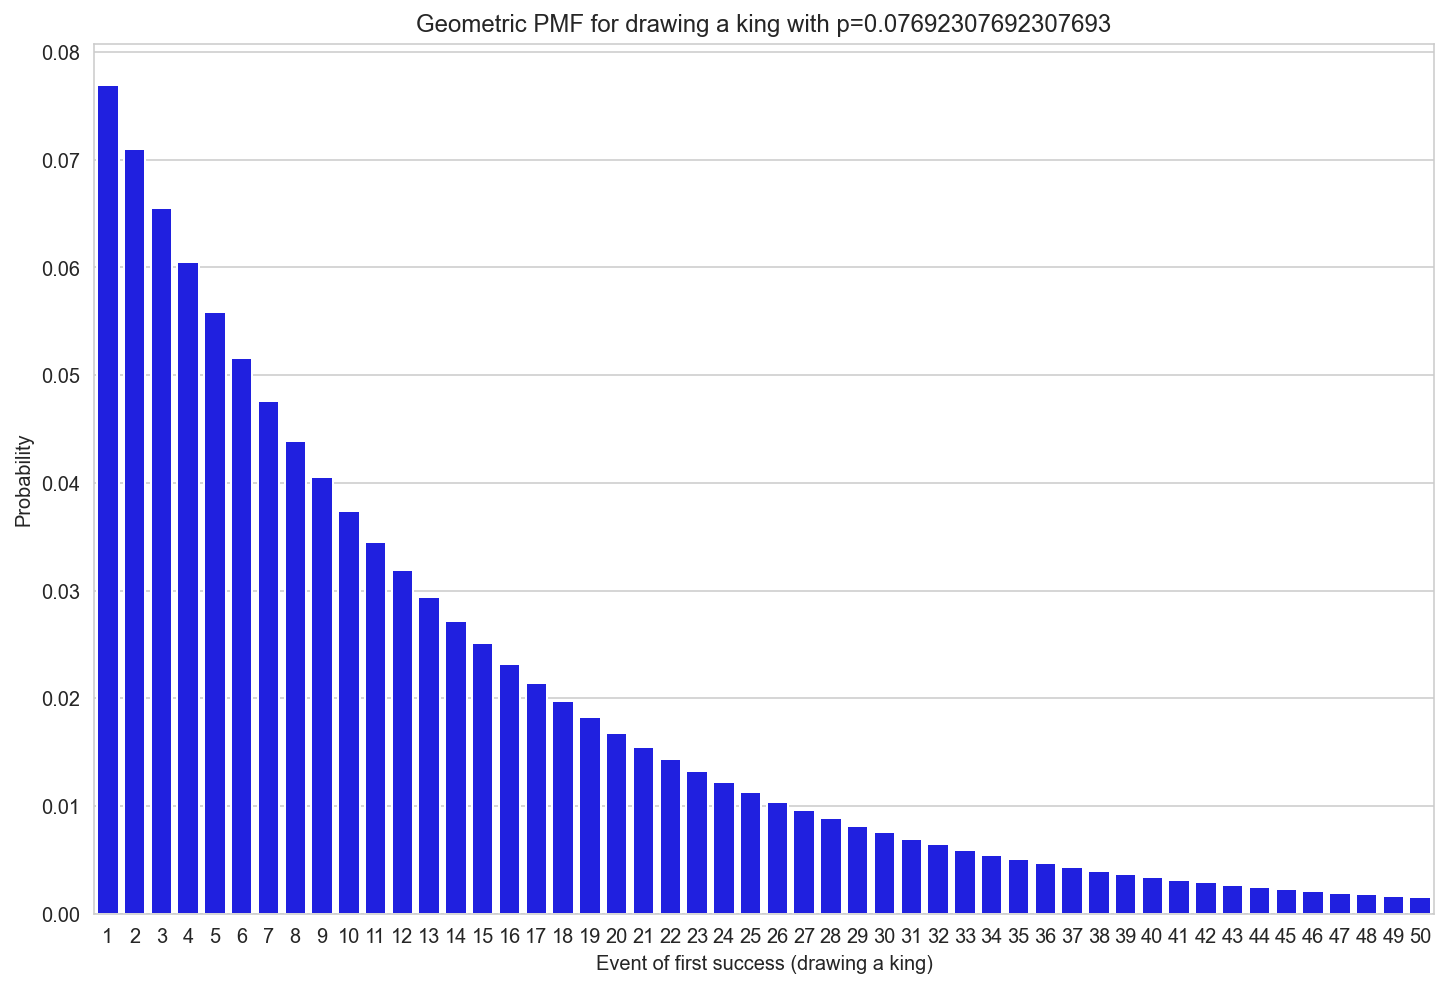

In [2]:
p = 4/52
geom_dist = stats.geom(p)
    
x = tuple(range(1,51))
prob = geom_dist.pmf(x)
pmf = pd.DataFrame({'Event of first success (drawing a king)':x, 'Probability':prob})

fig, ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(x = 'Event of first success (drawing a king)',y = 'Probability', data=pmf, color='blue', ax=ax)
plt.title('Geometric PMF for drawing a king with p={}'.format(p));

#### Geometric cdf

Likewise, the cumulative distribution function is:

$$ F(x|p) = 1 - (1 - p)^{x+1} $$

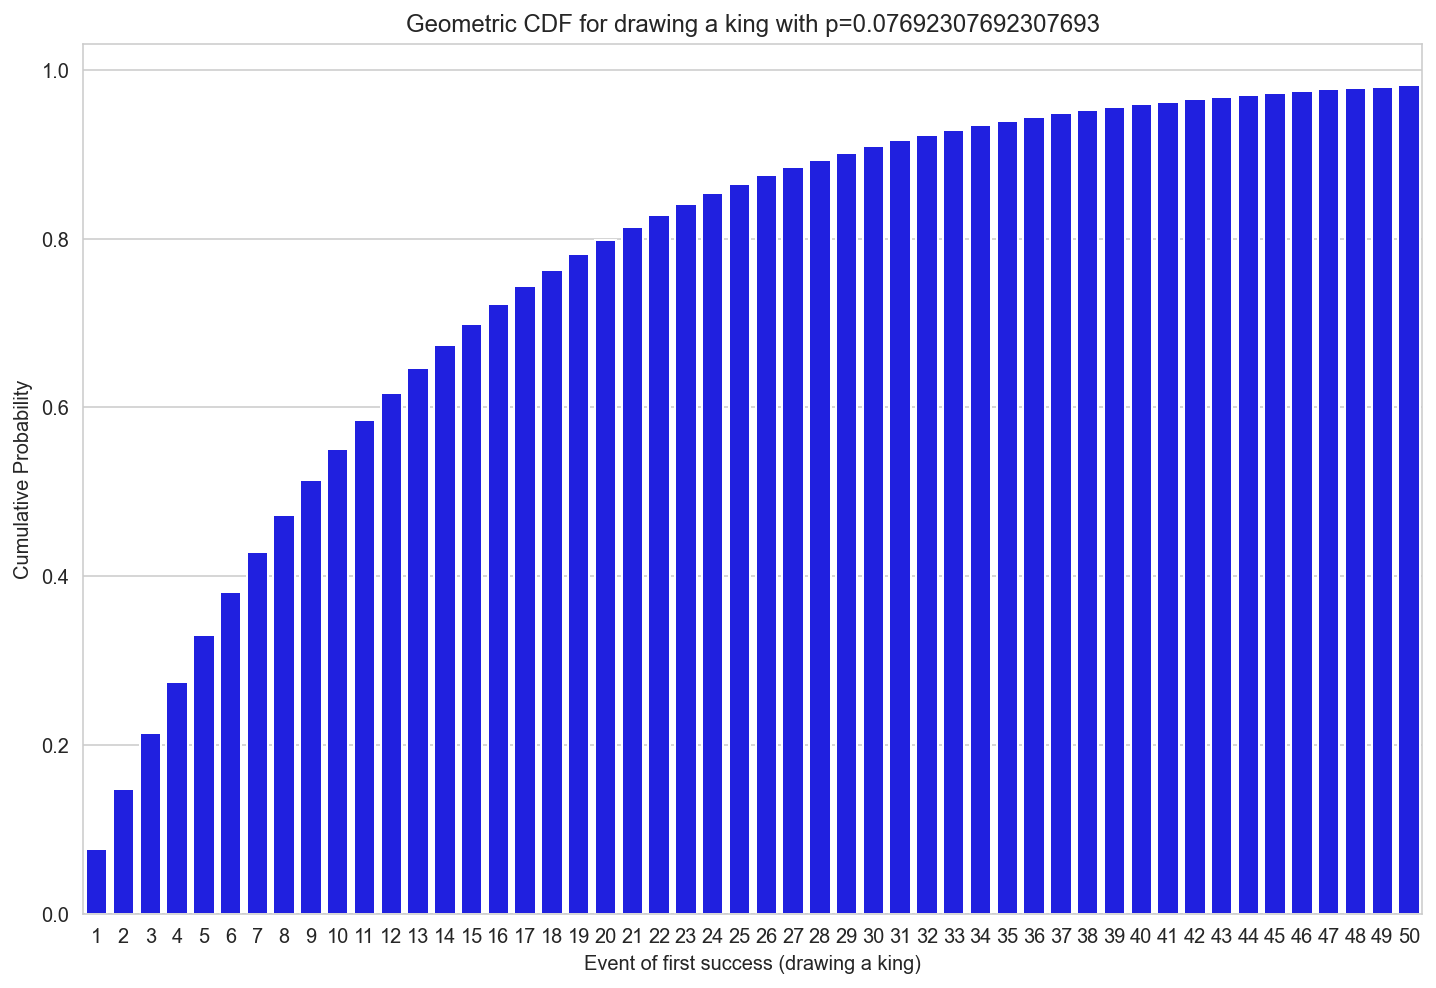

In [3]:
p = 4/52
geom_dist = stats.geom(p)
    
x = tuple(range(1,51))
cum_prob = geom_dist.cdf(x)
cdf = pd.DataFrame({'Event of first success (drawing a king)':x, 'Cumulative Probability':cum_prob})

fig, ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(x = 'Event of first success (drawing a king)', y = 'Cumulative Probability', data=cdf, color='blue', ax=ax)
plt.title('Geometric CDF for drawing a king with p={}'.format(p));

<a id='negative_binomial'></a>

## The Negative Binomial distribution

---

**Example**: I have a coin with some fixed probability of success $p$. I flip this coin repeatedly but stop when I get my $r^{th}$ heads. What is the probability of needing to flip my coin a specific number of times?

The Negative Binomial distribution is a generalization of the Geometric distribution. Where the Geometric distribution represents the number of trials until the first success, **the Negative Binomial represents the number of trials until the first $r$ successes.**

The Geometric is thus a special case of the Negative Binomial, where $r = 1$.

When we use this:

- each trial is independent of one another,
- when you have a constant probability of success $p$,
- when you have a binary outcome,
- when you have a fixed number of successes $r$.

**Note:** We do not have a fixed number of trials $n$!

Parameters of the distribution:

- probability of success $p$
- number of successes $r$

#### Negative Binomial pmf

$$ f(x|r, p) = P(X = x) = \binom{x+r-1}{x} p^x(1-p)^r $$

Where $x$ is the number of failures, $r$ is the number of successes, and $p$ is the probability of success.

For example, say we have a website. We want to measure the number of visitors that will come to the website before 3 of those visitors purchase our product. We know that the probability $p$ of any one visitor purchasing our product is 0.05.

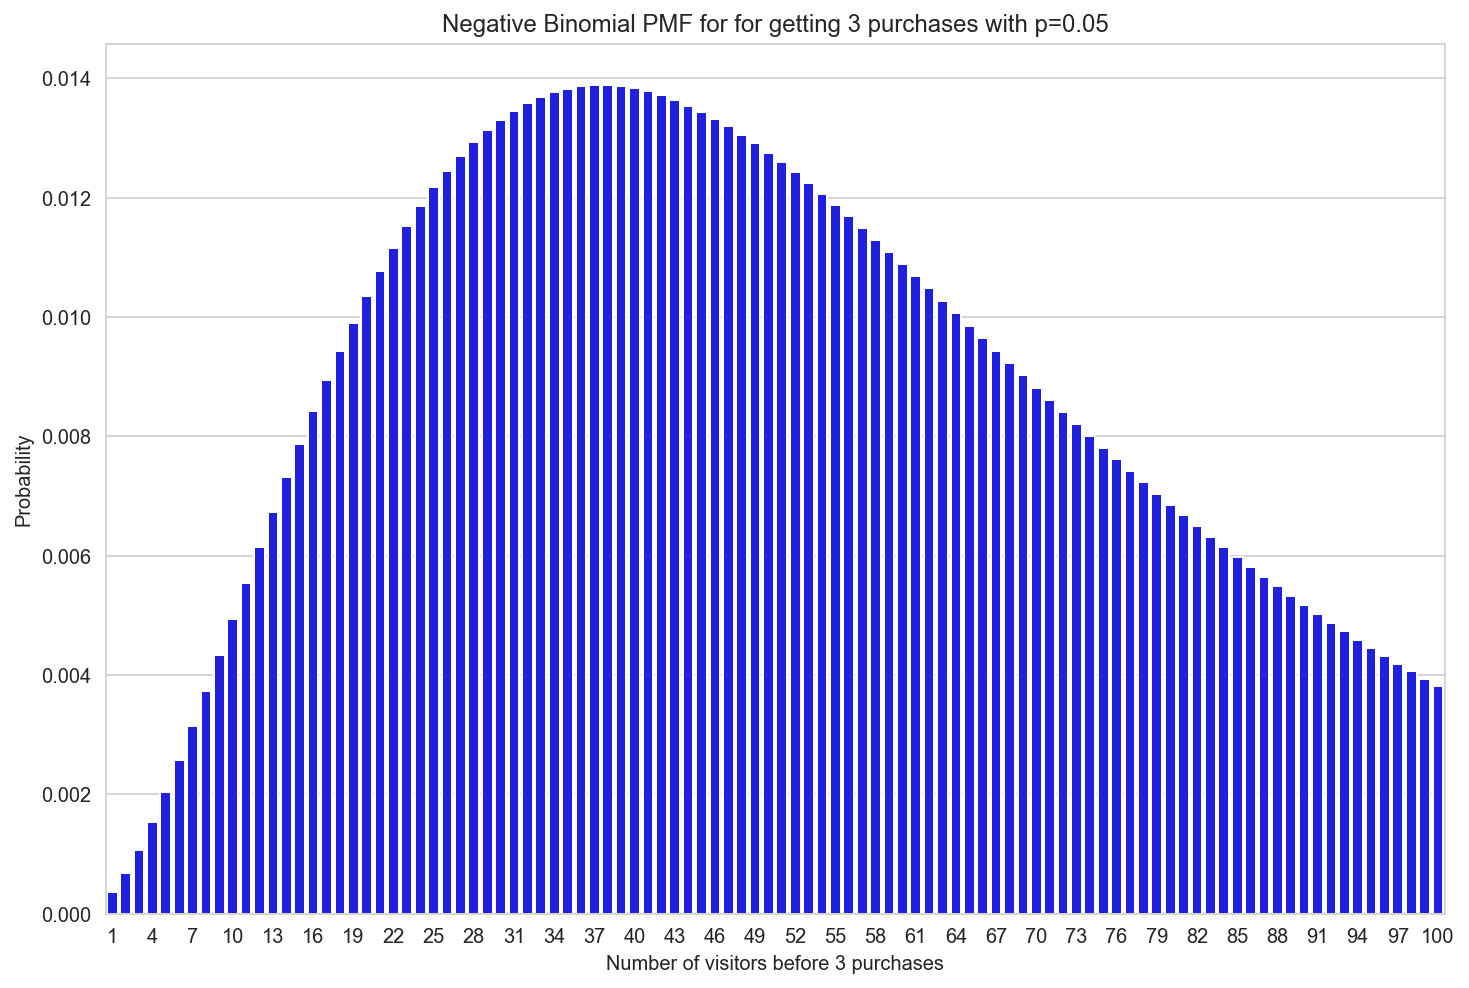

In [4]:
n = 3
p = 0.05
geom_dist = stats.nbinom(n,p)
    
x = tuple(range(1,101))
prob = geom_dist.pmf(x)
pmf = pd.DataFrame({'Number of visitors before 3 purchases':x, 'Probability':prob})

fig, ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(x = 'Number of visitors before 3 purchases', y = 'Probability', data=pmf, color='blue', ax=ax)
ax.set_xticks([i for i in range(100) if i % 3 == 0]) # choose which x locations to have ticks
ax.set_xticklabels([i for i in range(1,101) if (i-1) % 3 == 0]) # set the labels to display at those ticks
plt.title('Negative Binomial PMF for for getting {} purchases with p={}'.format(n, p));

#### Negative Binomial cdf

[The cumulative distribution function is more complex, using a beta function.](https://en.wikipedia.org/wiki/Negative_binomial_distribution) We won't cover it now, but we can still plot the cumulative distribution using the plotting function we wrote.

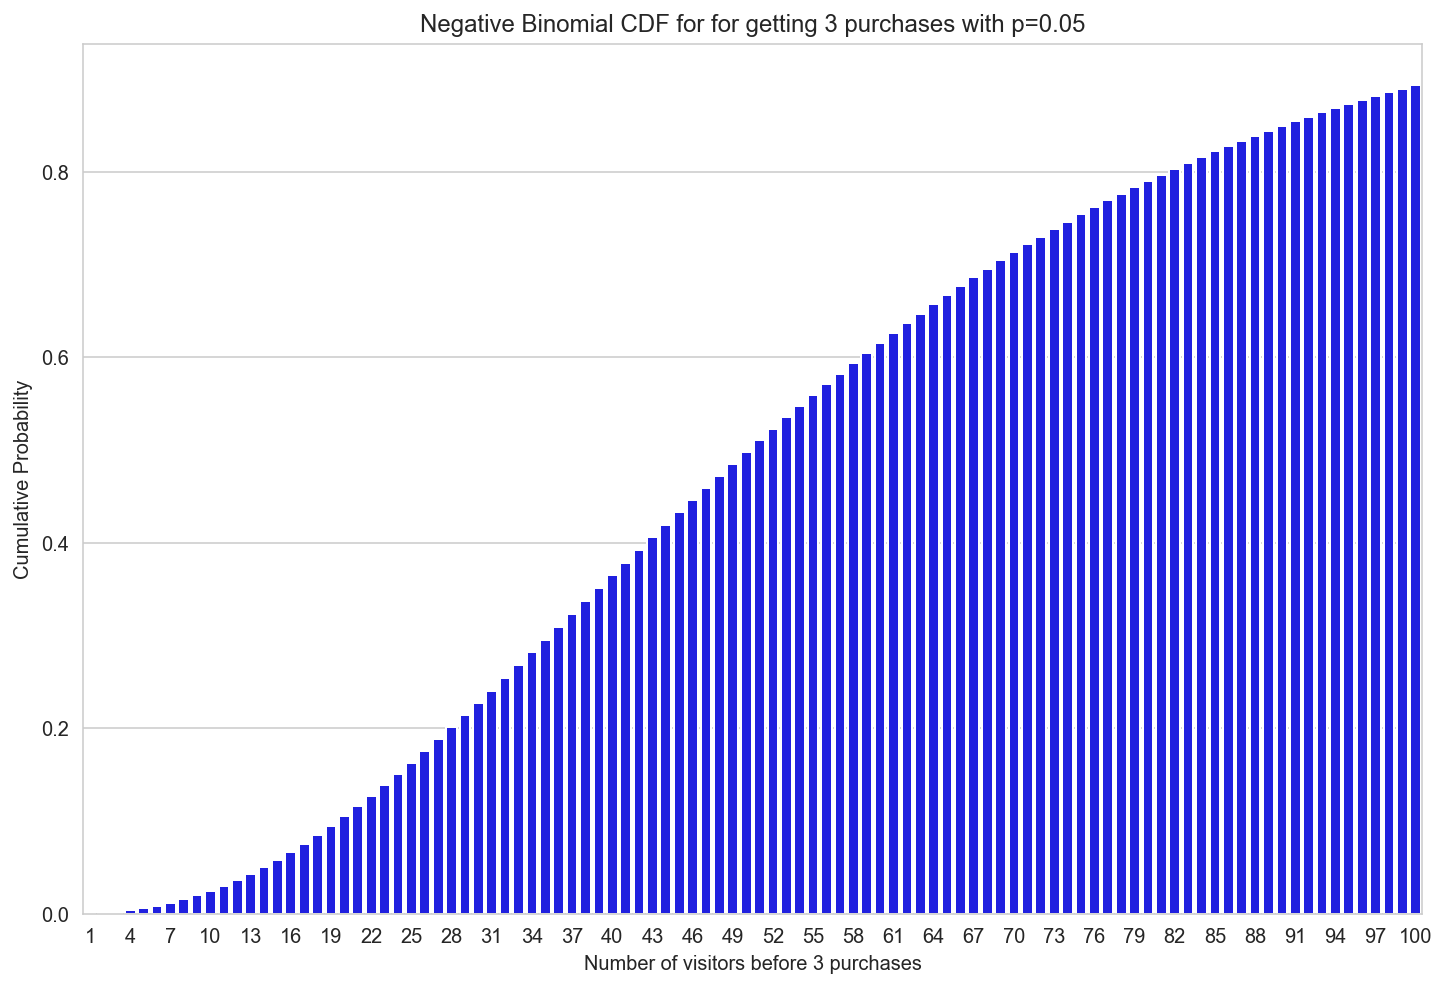

In [5]:
n = 3
p = 0.05
geom_dist = stats.nbinom(n,p)
    
x = tuple(range(1,101))
cum_prob = geom_dist.cdf(x)
cdf = pd.DataFrame({'Number of visitors before 3 purchases':x, 'Cumulative Probability':cum_prob})

fig, ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(x = 'Number of visitors before 3 purchases', y = 'Cumulative Probability', data=cdf, color='blue', ax=ax)
ax.set_xticks([i for i in range(100) if i % 3 == 0]) # choose which x locations to have ticks
ax.set_xticklabels([i for i in range(1,101) if (i-1) % 3 == 0]) # set the labels to display at those ticks
plt.title('Negative Binomial CDF for for getting {} purchases with p={}'.format(n, p));

## The Hypergeometric distribution (Optional)

---

**Example**: You have a deck of cards and start drawing cards, one at a time, from the desk. You decide to pull $n$  cards from the deck. What is the probability of getting specifically $x$ heart cards, **without putting the cards back in**?

The Hypergeometric distribution is directly related to the Binomial and Bernoulli.

The Binomial distribution would model the probability of drawing a heart when you are selecting the cards **with replacement.**

The Hypergeometric, on the other hand, models the probability of drawing a heart **without replacement.** This distribution is appropriate any time events are done without replacement.

Parameters of this distribution:

- $N$ fixed population,
- $n$ fixed trials, and
- $K$ possible successes.

#### Hypergeometric pmf

The Hypergeometric pmf is

$$  P(X = x|K,N,n) = \frac{\binom{K}{x} \binom{N - K}{n-x}}{\binom{N}{n}} $$

Where $N$ is the total size of the "population" (52 cards),

$K$ is the total number of possible "successes" (13 hearts),

$n$ is the number of trials, or draws,

$x$ is the number of successes in those draws

The pmf here displays how many hearts we expect to draw when we pull 20 cards from the deck:

In [ ]:
N = 52
K = 13
n = 20
hypergeom_dist = stats.hypergeom(N, K, n)
    
x = tuple(range(1,53))
prob = hypergeom_dist.pmf(x)
pmf = pd.DataFrame({'Number of hearts out of 20 drawn cards':x, 'Probability':prob})

fig, ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(x = 'Number of hearts out of 20 drawn cards', y = 'Probability', data=pmf, color='blue', ax=ax)
plt.title('Hypergeometric PMF for for number of hearts in {} cards drawn'.format(n));

#### Hypergeometric cdf

[The cumulative distribution function for the hypergeometric is complicated.](https://en.wikipedia.org/wiki/Hypergeometric_distribution)

We can plot out what it looks like for our scenario drawing 20 cards:

In [ ]:
N = 52
K = 13
n = 20
hypergeom_dist = stats.hypergeom(N, K, n)
    
x = tuple(range(1,53))
cum_prob = hypergeom_dist.cdf(x)
cdf = pd.DataFrame({'Number of hearts out of 20 drawn cards':x, 'Cumulative Probability':cum_prob})

fig, ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(x = 'Number of hearts out of 20 drawn cards', y = 'Cumulative Probability', data=cdf, color='blue', ax=ax)
plt.title('Hypergeometric PMF for for number of hearts in {} cards drawn'.format(n));

### When would we use Hypergeometric versus Binomial?

The Binomial distribution is appropriate when we have infinite sample size (i.e. can theoretically flip a coin an infinite number of times) or when the sample size is "so close" to infinity that it doesn't matter (i.e. the number of bacteria found on the average human body).

The Hypergeometric is more appropriate when we're working with non-infinitely large samples. A few examples might be the number of DSI-DC alumni or the number of sports stadiums in the United States.

There's no magical threshold for when one should use the Hypergeometric distribution and for when one should use the Binomial distribution. As data scientists, if we decide which distribution we want to use, we have to make the call about whether or not observations being independent is a realistic assumption. If I wanted to conduct some analysis on the number of restaurants in DC or the number of fish in a given lake, we'll have to make a judgment call.

### Independence

If you look at all of the distributions (except for Hypergeometric) above, we've assumed that our observations are independent of each other. This is one of the biggest judgment calls we will have to make as data scientists. If I conduct a poll in a state about who people support for office, it's possible (albeit unlikely!) that I get two or three people from the same family as poll respondents. Do we have to decide

More often than not, we'll assume independence. It's usually a reasonable assumption or the effects of dependence are so negligible relative to the effort to control for that dependence. However, in some cases, it may be dangerous for us to assume independence. See [Lucia de Berk](https://en.wikipedia.org/wiki/Lucia_de_Berk#Statistical_arguments), [Sally Clark](https://en.wikipedia.org/wiki/Sally_Clark), and [People v. Collins](https://en.wikipedia.org/wiki/People_v._Collins).

If you're nervous about dependence/independence, one recommendation is to do your analysis both ways and see how different your results are. If they're significantly different, you should go with the more theoretically-sound one. If the difference is negligible, you may decide to go with the simpler analysis. See [sensitivity analysis](https://en.wikipedia.org/wiki/Sensitivity_analysis).

“Mathematics, a veritable sorcerer in our computerized society, while assisting the trier of fact in the search for truth, must not cast a spell over him.” – California Supreme Court, *People v. Collins* (1968)